In [1]:
%reload_ext autoreload
%autoreload 2

import sys
import os

import numpy as np
import bloscpack as bp
%matplotlib inline

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *
from preprocess_utilities import *
from registration_utilities import *

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
No vtk
File does not exist: /data/CSHL_data_processed/DEMO999/DEMO999_anchor.txt
File does not exist: /data/CSHL_data_processed/DEMO999/DEMO999_sorted_filenames.txt
File does not exist: /data/CSHL_data_processed/DEMO999/DEMO999_sorted_filenames.txt
File does not exist: /data/CSHL_data_processed/DEMO999/DEMO999_anchor.txt
File does not exist: /data/CSHL_data_processed/DEMO999/DEMO999_anchor.txt
File does not exist: /data/CSHL_data_processed/DEMO999/DEMO999_anchor.txt


Setting environment for Precision WorkStation


# Compute the metrics

In [3]:
stack_moving = 'atlasV5'
detector_id = 15

In [4]:
# from sklearn.decomposition.pca import PCA

In [5]:
from aligner_v3 import Aligner

In [191]:
def find_best_jaccard(hm, hf, lr1=1, lr2=0.1, max_iter_num=100):
    
    aligner = Aligner({1: (hf, np.zeros((3,)))}, {1: (hm > level, np.zeros((3,)))}, labelIndexMap_m2f={1: 1}, verbose=False)
#     aligner.set_centroid(centroid_m='structure_centroid', centroid_f='centroid_m', indices_m=[1])
    aligner.set_centroid(centroid_m='structure_centroid', centroid_f='structure_centroid', indices_m=[1])
    aligner.compute_gradient(smooth_first=False)
    T, scores = aligner.optimize(tf_type='rigid', lr1=lr1, lr2=lr2, max_iter_num=max_iter_num)
    
    Ts = np.array(aligner.Ts)

#     plt.plot(Ts[:, [0,1,2,4,5,6,8,9,10]]);
#     plt.title('rotational params');
#     plt.xlabel('Iteration');
#     plt.show();

#     plt.plot(Ts[:, [3,7,11]]);
#     plt.title('translation params');
#     plt.xlabel('Iteration');
#     plt.show();

    plt.figure();
    plt.plot(scores);
    plt.show();

    transform_parameters = {'centroid_m': aligner.centroid_m,
                           'centroid_f': aligner.centroid_f,
                           'domain_f_origin_wrt_wholebrain': np.zeros((3,)),
                           'domain_m_origin_wrt_wholebrain': np.zeros((3,)),
                           'parameters': T}

    hm_aligned, hm_aligned_origin_wrt_hf = transform_volume_v4(hm, transform=transform_parameters,
                                                              return_origin_instead_of_bbox=True)

    hm_aligned = crop_and_pad_volume(hm_aligned, in_origin=hm_aligned_origin_wrt_hf, out_bbox=hf)
    
    return jaccard_masks(hm_aligned, hf, wrt_min=False)

In [248]:
atlas_spec = dict(name='atlasV5', resolution='10.0um', vol_type='score')

In [249]:
warp_setting = 17

In [ ]:
Failed cases (Jaccard = 0):
MD589 6N_R
MD589 3N_R
MD585 SNC_R
MD585 Sp5I_R
MD594 Sp5O_L
MD594 6N_R
MD594 SNC_R

loaded_cropbox_resolution down32
correlation = nan
mean voxel value difference = 1.0


Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [13.85430332 12.72898032 13.31514609], centroid_f: [12.0758209   8.93373134  7.13552239]
indices_f: set([1])


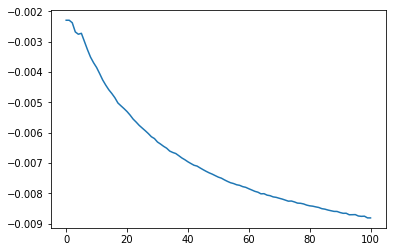

Interpolating/filling sparse volume: 0.01 seconds.


MD589 6N_R
level = 0.1
jaccard = 0.0
best = 0.304633345494
centroid_diff_um = nan um
centroid_diff_percentage = nan



Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [13.82044405 12.66174937 13.04962003], centroid_f: [12.0758209   8.93373134  7.13552239]
indices_f: set([1])


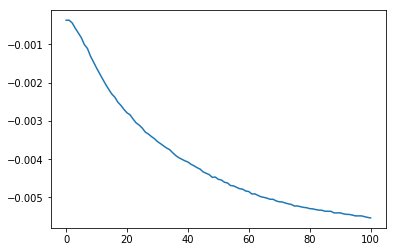

Interpolating/filling sparse volume: 0.00 seconds.


MD589 6N_R
level = 0.2
jaccard = 0.0
best = 0.379207694069
centroid_diff_um = nan um
centroid_diff_percentage = nan



Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [13.66617554 12.60387287 13.10818775], centroid_f: [12.0758209   8.93373134  7.13552239]
indices_f: set([1])


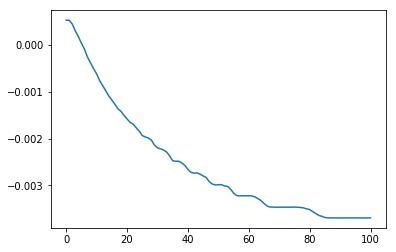

Interpolating/filling sparse volume: 0.00 seconds.


MD589 6N_R
level = 0.3
jaccard = 0.0
best = 0.459943181818
centroid_diff_um = nan um
centroid_diff_percentage = nan



Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [13.76134065 12.67177116 13.19098526], centroid_f: [12.0758209   8.93373134  7.13552239]
indices_f: set([1])


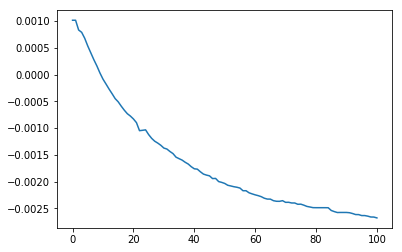

Interpolating/filling sparse volume: 0.00 seconds.


MD589 6N_R
level = 0.4
jaccard = 0.0
best = 0.509043077935
centroid_diff_um = nan um
centroid_diff_percentage = nan



Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [13.71660232 12.64749035 13.05173745], centroid_f: [12.0758209   8.93373134  7.13552239]
indices_f: set([1])


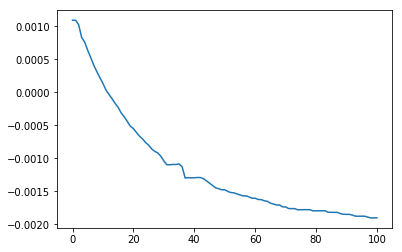

Interpolating/filling sparse volume: 0.00 seconds.


MD589 6N_R
level = 0.5
jaccard = 0.0
best = 0.566731141199
centroid_diff_um = nan um
centroid_diff_percentage = nan



Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [13.73463687 12.64357542 13.08603352], centroid_f: [12.0758209   8.93373134  7.13552239]
indices_f: set([1])


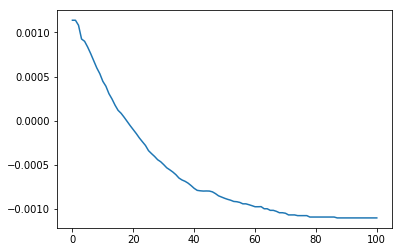

Interpolating/filling sparse volume: 0.00 seconds.


MD589 6N_R
level = 0.6
jaccard = 0.0
best = 0.621431913898
centroid_diff_um = nan um
centroid_diff_percentage = nan



Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [13.63179916 12.45941423 13.02677824], centroid_f: [12.0758209   8.93373134  7.13552239]
indices_f: set([1])


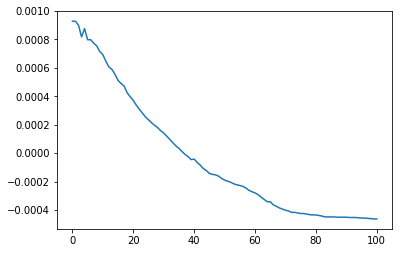

Interpolating/filling sparse volume: 0.00 seconds.


MD589 6N_R
level = 0.7
jaccard = 0.0
best = 0.544276457883
centroid_diff_um = nan um
centroid_diff_percentage = nan



Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [13.4679803  12.4137931  13.03448276], centroid_f: [12.0758209   8.93373134  7.13552239]
indices_f: set([1])


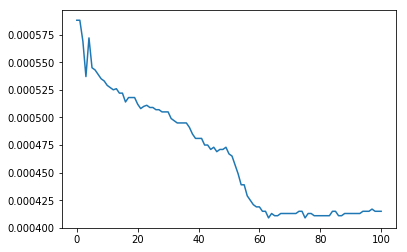

Interpolating/filling sparse volume: 0.00 seconds.


MD589 6N_R
level = 0.8
jaccard = 0.0
best = 0.377647058824
centroid_diff_um = nan um
centroid_diff_percentage = nan



Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [12.92696629 12.40449438 13.01123596], centroid_f: [12.0758209   8.93373134  7.13552239]
indices_f: set([1])
Error computing score/gradient for 1: Image gradient at all valid voxel is zero.
Error computing score/gradient for 1: Image gradient at all valid voxel is zero.
Error computing score/gradient for 1: Image gradient at all valid voxel is zero.
Error computing score/gradient for 1: Image gradient at all valid voxel is zero.
Error computing score/gradient for 1: Image gradient at all valid voxel is zero.
Error computing score/gradient for 1: Image gradient at all valid voxel is zero.
Error computing score/gradient for 1: Image gradient at all valid voxel is zero.
Error computing score/gradient for 1: Image gradient at all valid voxel is zero.
Error computing score/gradient for 1: Image gradient at all valid voxel is zero.
Error computing score/gradient for 1: Image grad

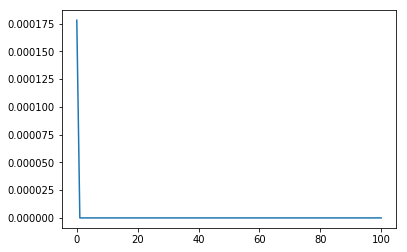

MD589 6N_R
level = 0.9
jaccard = 0.0
best = 0.118805970149
centroid_diff_um = nan um
centroid_diff_percentage = nan



Interpolating/filling sparse volume: 0.00 seconds.


In [260]:
metrics_allStacks_allStructures_allLevels = defaultdict(lambda: defaultdict(dict))
# metrics_allStacks_allStructures = defaultdict(lambda: defaultdict(dict))

for stack_fixed in ['MD589']:
# for stack_fixed in ['MD585','MD589','MD594']:
        
#     for structure in all_known_structures_sided:
    for structure in ['6N_R']:
        
        try:

            annotated_brain_spec = dict(name=stack_fixed, 
                                        vol_type='annotationAsScore', 
                                        resolution='10.0um')

            ann_vol_10um, ann_vol_origin_wrt_wholebrain_10um = \
            DataManager.load_original_volume_v2(stack_spec=annotated_brain_spec, 
                                                structure=structure, 
                                                bbox_wrt='wholebrain',
                                                return_origin_instead_of_bbox=True)

            ####################

            score_brain_spec = dict(name=stack_fixed,
                               vol_type='score',
                               detector_id=15,
                               prep_id=2,
                               resolution='10.0um')

            alignedAtlas_vol_m2f_10um, alignedAtlas_vol_m2f_origin_wrt_wholebrain_10um = \
            DataManager.load_transformed_volume_v2(alignment_spec=dict(stack_m=atlas_spec, 
                                                                       stack_f=score_brain_spec, 
                                                                       warp_setting=warp_setting),
                                                   structure=structure,
                                                   resolution='10.0um',
                                                                 return_origin_instead_of_bbox=True,
                                                                 legacy=True)

            ######################

            hf = ann_vol_10um > 0

    #             xyzs = np.array(np.where(hf))[[1,0,2]]
    #             pca = PCA(n_components=3)
    #             xyzs_transformed = pca.fit_transform(xyzs.T)
    #             principle_axes = pca.components_
    #             annotation_centroid = pca.mean_
    #             principal_axes_lengths_down32 = xyzs_transformed.max(axis=0) - xyzs_transformed[:, 0].min(axis=0)
    #             principal_axes_lengths_um = principal_axes_lengths_down32 * convert_resolution_string_to_voxel_size(resolution='down32', stack=stack_fixed)
    #             print stack_fixed, structure
    #             print 'principal_axes_lengths_um =', principal_axes_lengths_um
    #             del xyzs, xyzs_transformed, pca

            hm = crop_and_pad_volume(alignedAtlas_vol_m2f_10um, 
                                     in_origin=alignedAtlas_vol_m2f_origin_wrt_wholebrain_10um - ann_vol_origin_wrt_wholebrain_10um.astype(np.int),
                                     out_bbox=(0, hf.shape[1]-1, 0, hf.shape[0]-1, 0, hf.shape[2]-1))
            
    #             display_volume_sections(hf, start_level=0, direction='z')
    #             display_volume_sections(hm, start_level=0, direction='z')

            annVol_centroid_wrt_wholebrain_10um = compute_centroid_3d(hf)

    #             corr = np.corrcoef(hm.flatten(), hf.flatten())[0,1]
            mask = (hm > 0) | (hf > 0)   
            corr = np.corrcoef(hm[mask].flatten(), hf[mask].flatten())[0,1]

    #             mean_diff = np.sqrt(np.mean(np.abs(hm[mask] - hf[mask])**2))
            mean_diff = np.mean(np.abs(hm[mask].astype(np.float) - hf[mask].astype(np.float)))

            print 'correlation =', corr
            print 'mean voxel value difference =', mean_diff

    #             metrics_allStacks_allStructures[stack_fixed][structure] = {'corr': corr, 'mean_diff': mean_diff}

            for level in np.arange(0.1, 1, 0.1):

                alignedAtlas_centroid_wrt_wholebrain_10um = compute_centroid_3d(hm > level)

                centroid_diff_vec_10um = annVol_centroid_wrt_wholebrain_10um - \
                alignedAtlas_centroid_wrt_wholebrain_10um
    #                 centroid_diff_percentage = np.dot(principle_axes, centroid_diff_vec_down32) / principal_axes_lengths_down32
                centroid_diff_norm_10um = np.linalg.norm(centroid_diff_vec_10um)
                centroid_diff_percentage = centroid_diff_norm_10um / get_structure_length_at_direction(hf, centroid_diff_vec_10um)

                centroid_diff_um = np.linalg.norm(centroid_diff_vec_10um) * 10.

                jac = jaccard_masks(hm > level, hf, wrt_min=False)
                
                alignedAtlas_vol_m2f_10um_minimal, _ = crop_volume_to_minimal(alignedAtlas_vol_m2f_10um)
                best_jac = find_best_jaccard(alignedAtlas_vol_m2f_10um_minimal > level, hf,
                                            max_iter_num=100)

                print stack_fixed, structure
                print 'level =', float(level)
                print 'jaccard =', jac
                print 'best =', best_jac
    #             print 'corr =', corr,
                print 'centroid_diff_um =', centroid_diff_um, 'um'
                print 'centroid_diff_percentage =', centroid_diff_percentage
                print 

                metrics_allStacks_allStructures_allLevels[stack_fixed][structure][float(level)] = \
        {'corr': corr, 
         'mean_diff': mean_diff, 
         'jac':jac, 
             'best_jac': best_jac,
         'centroid_diff_um': centroid_diff_um, 
         'centroid_diff_percentage':centroid_diff_percentage
        }
            
        except Exception as e:
            sys.stderr.write("Cannot evaluate structure %s: %s\n" % (structure, e))
            continue

In [261]:
metrics_allStacks_allStructures_allLevels

defaultdict(<function __main__.<lambda>>,
            {'MD589': defaultdict(dict,
                         {'6N_R': {0.1: {'best_jac': 0.3046333454943451,
                            'centroid_diff_percentage': nan,
                            'centroid_diff_um': nan,
                            'corr': nan,
                            'jac': 0.0,
                            'mean_diff': 1.0},
                           0.2: {'best_jac': 0.379207694069155,
                            'centroid_diff_percentage': nan,
                            'centroid_diff_um': nan,
                            'corr': nan,
                            'jac': 0.0,
                            'mean_diff': 1.0},
                           0.30000000000000004: {'best_jac': 0.45994318181818183,
                            'centroid_diff_percentage': nan,
                            'centroid_diff_um': nan,
                            'corr': nan,
                            'jac': 0.0,
                    

In [259]:
metrics_allStacks_allStructures_allLevels

defaultdict(<function __main__.<lambda>>,
            {'MD589': defaultdict(dict,
                         {'3N_R': {0.1: {'best_jac': 0.6982797069130297,
                            'centroid_diff_percentage': nan,
                            'centroid_diff_um': nan,
                            'corr': nan,
                            'jac': 0.0,
                            'mean_diff': 1.0},
                           0.2: {'best_jac': 0.7842590527176742,
                            'centroid_diff_percentage': nan,
                            'centroid_diff_um': nan,
                            'corr': nan,
                            'jac': 0.0,
                            'mean_diff': 1.0},
                           0.30000000000000004: {'best_jac': 0.8040521336635673,
                            'centroid_diff_percentage': nan,
                            'centroid_diff_um': nan,
                            'corr': nan,
                            'jac': 0.0,
                    

In [257]:
metrics_allStacks_allStructures_allLevels

defaultdict(<function __main__.<lambda>>,
            {'MD585': defaultdict(dict,
                         {'SNC_R': {0.1: {'best_jac': 0.06806856795457752,
                            'centroid_diff_percentage': nan,
                            'centroid_diff_um': nan,
                            'corr': nan,
                            'jac': 0.0,
                            'mean_diff': 1.0},
                           0.2: {'best_jac': 0.08950857767753401,
                            'centroid_diff_percentage': nan,
                            'centroid_diff_um': nan,
                            'corr': nan,
                            'jac': 0.0,
                            'mean_diff': 1.0},
                           0.30000000000000004: {'best_jac': 0.0654899706343904,
                            'centroid_diff_percentage': nan,
                            'centroid_diff_um': nan,
                            'corr': nan,
                            'jac': 0.0,
                 

In [255]:
metrics_allStacks_allStructures_allLevels

defaultdict(<function __main__.<lambda>>,
            {'MD585': defaultdict(dict,
                         {'Sp5I_R': {0.1: {'best_jac': 0.5128531092347014,
                            'centroid_diff_percentage': nan,
                            'centroid_diff_um': nan,
                            'corr': nan,
                            'jac': 0.0,
                            'mean_diff': 1.0},
                           0.2: {'best_jac': 0.5138366599170765,
                            'centroid_diff_percentage': nan,
                            'centroid_diff_um': nan,
                            'corr': nan,
                            'jac': 0.0,
                            'mean_diff': 1.0},
                           0.30000000000000004: {'best_jac': 0.5384468472703767,
                            'centroid_diff_percentage': nan,
                            'centroid_diff_um': nan,
                            'corr': nan,
                            'jac': 0.0,
                  

In [253]:
metrics_allStacks_allStructures_allLevels

defaultdict(<function __main__.<lambda>>,
            {'MD594': defaultdict(dict,
                         {'Sp5O_L': {0.1: {'best_jac': 0.432364328609397,
                            'centroid_diff_percentage': nan,
                            'centroid_diff_um': nan,
                            'corr': nan,
                            'jac': 0.0,
                            'mean_diff': 1.0},
                           0.2: {'best_jac': 0.42168615793796693,
                            'centroid_diff_percentage': nan,
                            'centroid_diff_um': nan,
                            'corr': nan,
                            'jac': 0.0,
                            'mean_diff': 1.0},
                           0.30000000000000004: {'best_jac': 0.40751302270995904,
                            'centroid_diff_percentage': nan,
                            'centroid_diff_um': nan,
                            'corr': nan,
                            'jac': 0.0,
                 

In [ ]:
defaultdict(<function __main__.<lambda>>,
            {'MD594': defaultdict(dict,
                         {'6N_R': {0.1: {'best_jac': 0.5309766763848397,
                            'centroid_diff_percentage': nan,
                            'centroid_diff_um': nan,
                            'corr': nan,
                            'jac': 0.0,
                            'mean_diff': 1.0},
                           0.2: {'best_jac': 0.6795580110497238,
                            'centroid_diff_percentage': nan,
                            'centroid_diff_um': nan,
                            'corr': nan,
                            'jac': 0.0,
                            'mean_diff': 1.0},
                           0.30000000000000004: {'best_jac': 0.7446767324816105,
                            'centroid_diff_percentage': nan,
                            'centroid_diff_um': nan,
                            'corr': nan,
                            'jac': 0.0,
                            'mean_diff': 1.0},
                           0.4: {'best_jac': 0.7016622922134733,
                            'centroid_diff_percentage': nan,
                            'centroid_diff_um': nan,
                            'corr': nan,
                            'jac': 0.0,
                            'mean_diff': 1.0},
                           0.5: {'best_jac': 0.5445120576966419,
                            'centroid_diff_percentage': nan,
                            'centroid_diff_um': nan,
                            'corr': nan,
                            'jac': 0.0,
                            'mean_diff': 1.0},
                           0.6: {'best_jac': 0.3811030741410488,
                            'centroid_diff_percentage': nan,
                            'centroid_diff_um': nan,
                            'corr': nan,
                            'jac': 0.0,
                            'mean_diff': 1.0},
                           0.7000000000000001: {'best_jac': 0.26582278481012656,
                            'centroid_diff_percentage': nan,
                            'centroid_diff_um': nan,
                            'corr': nan,
                            'jac': 0.0,
                            'mean_diff': 1.0},
                           0.8: {'best_jac': 0.14195298372513562,
                            'centroid_diff_percentage': nan,
                            'centroid_diff_um': nan,
                            'corr': nan,
                            'jac': 0.0,
                            'mean_diff': 1.0},
                           0.9: {'best_jac': 0.03322784810126582,
                            'centroid_diff_percentage': nan,
                            'centroid_diff_um': nan,
                            'corr': nan,
                            'jac': 0.0,
                            'mean_diff': 1.0}}})})

defaultdict(<function __main__.<lambda>>,
            {'MD594': defaultdict(dict,
                         {'SNC_R': {0.1: {'best_jac': 0.1673085379992271,
                            'centroid_diff_percentage': nan,
                            'centroid_diff_um': nan,
                            'corr': nan,
                            'jac': 0.0,
                            'mean_diff': 1.0},
                           0.2: {'best_jac': 0.18368087633628086,
                            'centroid_diff_percentage': nan,
                            'centroid_diff_um': nan,
                            'corr': nan,
                            'jac': 0.0,
                            'mean_diff': 1.0},
                           0.30000000000000004: {'best_jac': 0.20079464495420027,
                            'centroid_diff_percentage': nan,
                            'centroid_diff_um': nan,
                            'corr': nan,
                            'jac': 0.0,
                            'mean_diff': 1.0},
                           0.4: {'best_jac': 0.21449568252801765,
                            'centroid_diff_percentage': nan,
                            'centroid_diff_um': nan,
                            'corr': nan,
                            'jac': 0.0,
                            'mean_diff': 1.0},
                           0.5: {'best_jac': 0.19810856611818728,
                            'centroid_diff_percentage': nan,
                            'centroid_diff_um': nan,
                            'corr': nan,
                            'jac': 0.0,
                            'mean_diff': 1.0},
                           0.6: {'best_jac': 0.1807667789818778,
                            'centroid_diff_percentage': nan,
                            'centroid_diff_um': nan,
                            'corr': nan,
                            'jac': 0.0,
                            'mean_diff': 1.0},
                           0.7000000000000001: {'best_jac': 0.12469380999668984,
                            'centroid_diff_percentage': nan,
                            'centroid_diff_um': nan,
                            'corr': nan,
                            'jac': 0.0,
                            'mean_diff': 1.0},
                           0.8: {'best_jac': 0.07709808814355437,
                            'centroid_diff_percentage': nan,
                            'centroid_diff_um': nan,
                            'corr': nan,
                            'jac': 0.0,
                            'mean_diff': 1.0},
                           0.9: {'best_jac': 0.007855634194241672,
                            'centroid_diff_percentage': nan,
                            'centroid_diff_um': nan,
                            'corr': nan,
                            'jac': 0.0,
                            'mean_diff': 1.0}}})})

In [38]:
metrics_allStacks_allStructures_allLevels.default_factory = None

In [26]:
if warp_setting == 20:
    fp = '/home/yuncong/Dropbox/BrainProjectFiguresByTopic/Registration/compare_vs_expert_annotation/measurements/global_registration_metrics_allStacks_allStructures_allLevels.json'
elif warp_setting == 17:
    fp = '/home/yuncong/Dropbox/BrainProjectFiguresByTopic/Registration/compare_vs_expert_annotation/measurements/local_registration_metrics_allStacks_allStructures_allLevels.json'

In [43]:
global_registration_metrics_allStacks_allStructures_allLevels = \
load_data('/home/yuncong/Dropbox/BrainProjectFiguresByTopic/Registration/compare_vs_expert_annotation/measurements/global_registration_metrics_allStacks_allStructures_allLevels.json')

In [44]:
global_registration_metrics_allStacks_allStructures_allLevels_withBestAlignBaseline = \
load_data('/home/yuncong/Dropbox/BrainProjectFiguresByTopic/Registration/compare_vs_expert_annotation/measurements/global_registration_metrics_allStacks_allStructures_allLevels_withBestAlignBaseline.json')

In [45]:
local_registration_metrics_allStacks_allStructures_allLevels = \
load_data('/home/yuncong/Dropbox/BrainProjectFiguresByTopic/Registration/compare_vs_expert_annotation/measurements/local_registration_metrics_allStacks_allStructures_allLevels.json')

In [46]:
local_registration_metrics_allStacks_allStructures_allLevels_withBestAlignBaseline = \
load_data('/home/yuncong/Dropbox/BrainProjectFiguresByTopic/Registration/compare_vs_expert_annotation/measurements/local_registration_metrics_allStacks_allStructures_allLevels_withBestAlignBaseline.json')

In [47]:
local_registration_metrics_allStacks_allStructures_allLevels

{u'MD585': {u'10N_L': {u'0.1': {u'centroid_diff_percentage': 0.027104314974618526,
    u'centroid_diff_um': 28.036148074092363,
    u'corr': 0.7223655140729413,
    u'jac': 0.5094909835656126,
    u'mean_diff': 0.2200485825272617},
   u'0.2': {u'centroid_diff_percentage': 0.0285551506399903,
    u'centroid_diff_um': 27.965513406902545,
    u'corr': 0.7223655140729413,
    u'jac': 0.5917979874691475,
    u'mean_diff': 0.2200485825272617},
   u'0.30000000000000004': {u'centroid_diff_percentage': 0.031156987930582414,
    u'centroid_diff_um': 25.330681422565373,
    u'corr': 0.7223655140729413,
    u'jac': 0.6115523200235311,
    u'mean_diff': 0.2200485825272617},
   u'0.4': {u'centroid_diff_percentage': 0.03342614739385406,
    u'centroid_diff_um': 24.1670063813552,
    u'corr': 0.7223655140729413,
    u'jac': 0.5733615050180814,
    u'mean_diff': 0.2200485825272617},
   u'0.5': {u'centroid_diff_percentage': 0.04294031781606273,
    u'centroid_diff_um': 23.324181530584287,
    u'corr': 0

In [48]:
local_registration_metrics_allStacks_allStructures_allLevels_withBestAlignBaseline

{u'MD585': {u'10N_L': {u'0.1': {u'best_jac': 0.5170030959752322,
    u'centroid_diff_percentage': 0.027104314974618526,
    u'centroid_diff_um': 28.036148074092363,
    u'corr': 0.7223655140729413,
    u'jac': 0.5094909835656126,
    u'mean_diff': 0.2200485825272617},
   u'0.2': {u'best_jac': 0.6420043124255784,
    u'centroid_diff_percentage': 0.0285551506399903,
    u'centroid_diff_um': 27.965513406902545,
    u'corr': 0.7223655140729413,
    u'jac': 0.5917979874691475,
    u'mean_diff': 0.2200485825272617},
   u'0.30000000000000004': {u'best_jac': 0.7274102226014116,
    u'centroid_diff_percentage': 0.031156987930582414,
    u'centroid_diff_um': 25.330681422565373,
    u'corr': 0.7223655140729413,
    u'jac': 0.6115523200235311,
    u'mean_diff': 0.2200485825272617},
   u'0.4': {u'best_jac': 0.7123639529821506,
    u'centroid_diff_percentage': 0.03342614739385406,
    u'centroid_diff_um': 24.1670063813552,
    u'corr': 0.7223655140729413,
    u'jac': 0.5733615050180814,
    u'mean_d

In [ ]:
# create_parent_dir_if_not_exists(fp)
# save_data(metrics_allStacks_allStructures_allLevels, fp)

In [39]:
if warp_setting == 20:
    fp = '/home/yuncong/Dropbox/BrainProjectFiguresByTopic/Registration/compare_vs_expert_annotation/measurements/global_registration_metrics_allStacks_allStructures_allLevels_withBestAlignBaseline.json'
elif warp_setting == 17:
    fp = '/home/yuncong/Dropbox/BrainProjectFiguresByTopic/Registration/compare_vs_expert_annotation/measurements/local_registration_metrics_allStacks_allStructures_allLevels_withBestAlignBaseline.json'

In [40]:
# create_parent_dir_if_not_exists(fp)
# save_data(metrics_allStacks_allStructures_allLevels, fp)

# Plot the metric results

# Global registration metrics

In [86]:
global_registration_metrics_allStacks_allStructures_allLevels = \
load_data('/home/yuncong/Dropbox/BrainProjectFiguresByTopic/Registration/compare_vs_expert_annotation/measurements/global_registration_metrics_allStacks_allStructures_allLevels.json')

## Jaccard

In [49]:
global_jaccard_all_stacks_all_structures = \
{stack: {s: np.nanmax([v['jac'] for l, v in x_all_l.iteritems()]) 
         for s, x_all_l in x_all_s_all_l.iteritems()}
 for stack, x_all_s_all_l in global_registration_metrics_allStacks_allStructures_allLevels.iteritems()}

In [50]:
print 'Median Jaccard index between aligned atlas and expert annotation:', np.median([y for x in global_jaccard_all_stacks_all_structures.values() for y in x.values()])

Median Jaccard index between aligned atlas and expert annotation: 0.45254931086441036


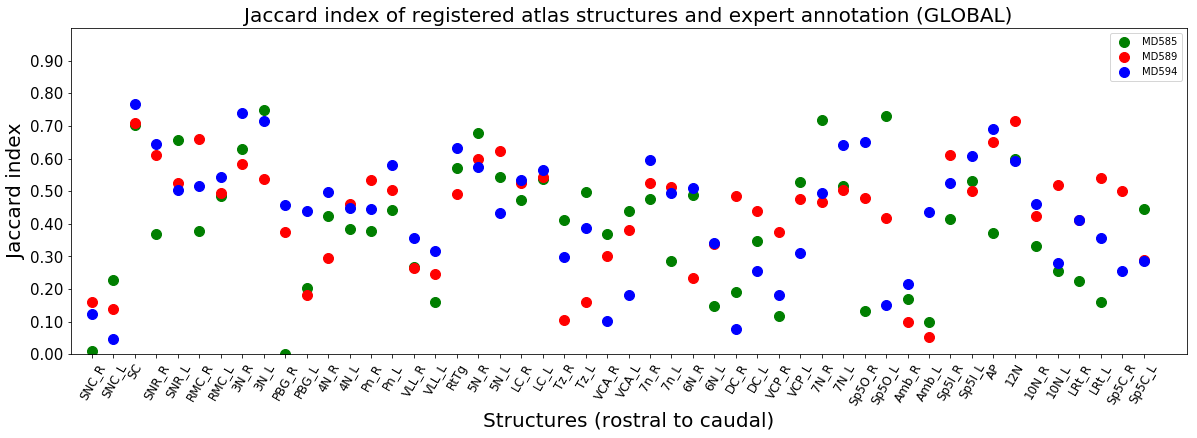

In [52]:
plot_by_stack_by_structure(global_jaccard_all_stacks_all_structures, 
                           structures=structures_sided_sorted_by_rostral_caudal_position,
                           yticks=np.arange(0, 1., 0.1), 
                           yticklabel_fmt='%.2f',
                           ylabel='Jaccard index',
                           xlabel='Structures (rostral to caudal)',
                          title='Jaccard index of registered atlas structures and expert annotation (GLOBAL)',
                          stack_to_color={'MD589':(255,0,0), 'MD585': (0,127,0), 'MD594': (0,0,255)});

## Centroid error

In [79]:
diff_all_stacks_all_structures = \
{stack: {s: np.nanmin([v['centroid_diff_um'] for l, v in x_all_l.iteritems()]) for s, x_all_l in x_all_s_all_l.iteritems()}
 for stack, x_all_s_all_l in global_registration_metrics_allStacks_allStructures_allLevels.iteritems()}

In [80]:
print 'Median centroid error:', np.median([y for x in diff_all_stacks_all_structures.values() for y in x.values()]), 'um'

Median centroid error: 92.3507757411921 um


In [81]:
# Only show motor nuclei (for use together with CHAT figure).

diff_all_stacks_all_structures_motor_nuclei_only = {stack: {s: data_all_structures[s] 
                                                            for s in ['5N_L', '5N_R', '6N_L', '6N_R',
                                      '7N_L', '7N_R', 'Amb_L', 'Amb_R',
                                      '10N_L', '10N_R', '12N']} 
 for stack, data_all_structures in diff_all_stacks_all_structures.iteritems()}

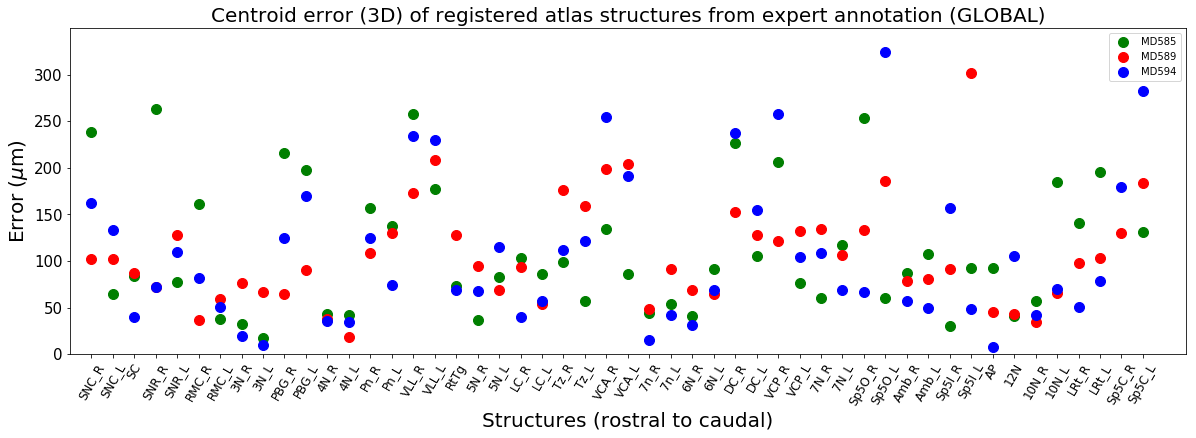

In [85]:
plot_by_stack_by_structure(diff_all_stacks_all_structures, 
                           structures=structures_sided_sorted_by_rostral_caudal_position,
                           yticks=np.arange(0, 350, 50), 
                           yticklabel_fmt='%d',
                           ylabel='Error ($\mu$m)',
                           xlabel='Structures (rostral to caudal)',
                          title='Centroid error (3D) of registered atlas structures from expert annotation (GLOBAL)',
                          stack_to_color={'MD589':(255,0,0), 'MD585': (0,127,0), 'MD594': (0,0,255)});

## Centroid error normalized

In [86]:
diffperc_all_stacks_all_structures = \
{stack: {s: np.nanmin([v['centroid_diff_percentage'] for l, v in x_all_l.iteritems()]) for s, x_all_l in x_all_s_all_l.iteritems()}
 for stack, x_all_s_all_l in global_registration_metrics_allStacks_allStructures_allLevels.iteritems()}

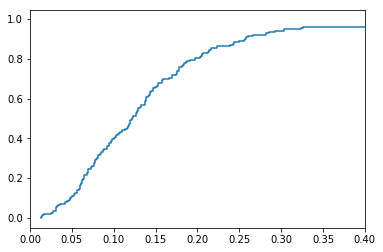

In [87]:
sorted_data = np.sort(([y for x in diffperc_all_stacks_all_structures.values() for y in x.values()]))
plt.step(sorted_data, np.arange(sorted_data.size)/float(len(sorted_data)));  # From 0 to the number of data points-1
plt.xlim([0, 0.4]);
# plt.step(sorted_data[::-1], np.arange(sorted_data.size))  # From the number of data points-1 to 0

In [88]:
print 'Median centroid error (normalized by structure size):', np.median([y for x in diffperc_all_stacks_all_structures.values() for y in x.values()]), 'um'

Median centroid error (normalized by structure size): 0.12223631188760731 um


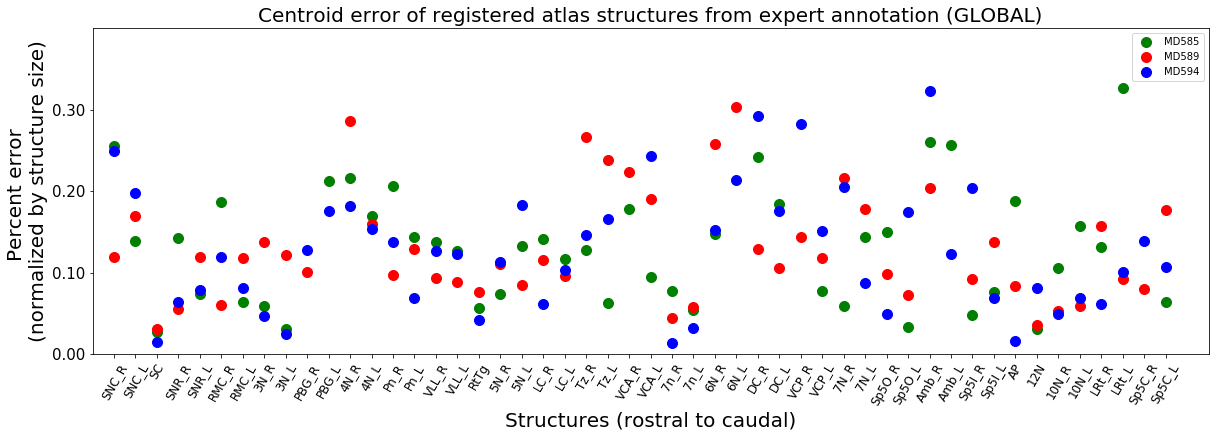

In [89]:
plot_by_stack_by_structure(diffperc_all_stacks_all_structures, 
                           structures=structures_sided_sorted_by_rostral_caudal_position,
                           yticks=np.arange(0, 0.35, 0.1), 
                                                      xlabel='Structures (rostral to caudal)',
                           ylabel='Percent error \n(normalized by structure size)',
                          title='Centroid error of registered atlas structures from expert annotation (GLOBAL)',
                          stack_to_color={'MD589':(255,0,0), 'MD585': (0,127,0), 'MD594': (0,0,255)});

# Local registration metrics

In [2]:
local_registration_metrics_allStacks_allStructures_allLevels = \
load_data('/home/yuncong/Dropbox/BrainProjectFiguresByTopic/Registration/compare_vs_expert_annotation/measurements/local_registration_metrics_allStacks_allStructures_allLevels.json')

In [10]:
local_registration_metrics_allStacks_allStructures_allLevels_withBestAlignBaseline = \
load_data('/home/yuncong/Dropbox/BrainProjectFiguresByTopic/Registration/compare_vs_expert_annotation/measurements/local_registration_metrics_allStacks_allStructures_allLevels_withBestAlignBaseline.json')

## Jaccard

In [3]:
jaccard_all_stacks_all_structures = \
{stack: {s: np.nanmax([v['jac'] for l, v in x_all_l.iteritems()]) 
         for s, x_all_l in x_all_s_all_l.iteritems()}
 for stack, x_all_s_all_l in local_registration_metrics_allStacks_allStructures_allLevels.iteritems()}

In [4]:
print 'Median Jaccard index between aligned atlas and expert annotation:', np.median([y for x in jaccard_all_stacks_all_structures.values() for y in x.values()])

Median Jaccard index between aligned atlas and expert annotation: 0.6062672499056663


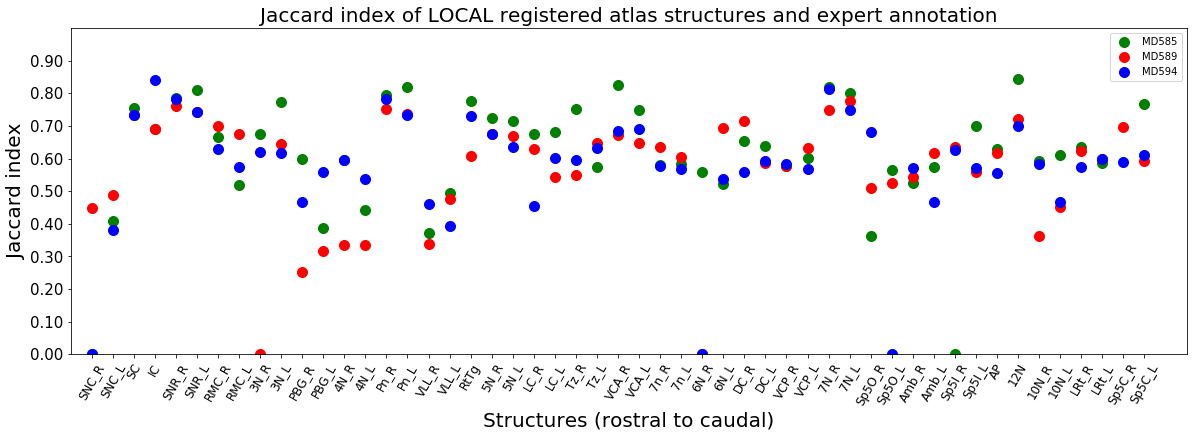

In [5]:
plot_by_stack_by_structure(jaccard_all_stacks_all_structures, 
                           structures=structures_sided_sorted_by_rostral_caudal_position,
#                            structures=structures_sided_sorted_by_rostral_caudal_position,
                           yticks=np.arange(0, 1., 0.1), 
                           yticklabel_fmt='%.2f',
                           ylabel='Jaccard index',
                           xlabel='Structures (rostral to caudal)',
                          title='Jaccard index of LOCAL registered atlas structures and expert annotation',
                          stack_to_color={'MD589':(255,0,0), 'MD585': (0,127,0), 'MD594': (0,0,255)});

## Jaccard with best possible

In [11]:
jaccard_all_stacks_all_structures = \
{stack: {s: 0. for s in structures_sided_sorted_by_rostral_caudal_position}
 for stack, x_all_s_all_l in local_registration_metrics_allStacks_allStructures_allLevels_withBestAlignBaseline.iteritems()}

In [12]:
jaccard_all_stacks_all_structures_best_level = defaultdict(dict)

In [13]:
for stack, x_all_s_all_l in local_registration_metrics_allStacks_allStructures_allLevels_withBestAlignBaseline.iteritems():
    for s, x_all_l in x_all_s_all_l.iteritems():
        jaccard_all_stacks_all_structures[stack][s] = np.nanmax([v['jac'] for l, v in x_all_l.iteritems()])
        jaccard_all_stacks_all_structures_best_level[stack][s] = x_all_l.keys()[np.nanargmax([x_all_l[l]['jac'] for l in x_all_l.keys()])]

In [14]:
print "Failed cases (Jaccard = 0):"
for stack in jaccard_all_stacks_all_structures.iterkeys():
    for s in jaccard_all_stacks_all_structures[stack].iterkeys():
        if jaccard_all_stacks_all_structures[stack][s] == 0:
            print stack, s

Failed cases (Jaccard = 0):
MD589 6N_R
MD589 3N_R
MD585 SNC_R
MD585 Sp5I_R
MD594 Sp5O_L
MD594 6N_R
MD594 SNC_R


In [15]:
# jaccard_all_stacks_all_structures = \
# {stack: {s: np.nanmax([v['jac'] for l, v in x_all_l.iteritems()]) 
#          for s, x_all_l in x_all_s_all_l.iteritems()}
#  for stack, x_all_s_all_l in local_registration_metrics_allStacks_allStructures_allLevels_withBestAlignBaseline.iteritems()}

In [16]:
best_jaccard_all_stacks_all_structures = \
{stack: {s: 0. for s in structures_sided_sorted_by_rostral_caudal_position}
 for stack, x_all_s_all_l in local_registration_metrics_allStacks_allStructures_allLevels_withBestAlignBaseline.iteritems()}

In [17]:
for stack, x_all_s_all_l in local_registration_metrics_allStacks_allStructures_allLevels_withBestAlignBaseline.iteritems():
    for s, x_all_l in x_all_s_all_l.iteritems():
        best_jaccard_all_stacks_all_structures[stack][s] = max(x_all_l[jaccard_all_stacks_all_structures_best_level[stack][s]]['best_jac'], jaccard_all_stacks_all_structures[stack][s])

In [18]:
best_jaccard_all_stacks_all_structures['MD589']['6N_R'] = 0.62
best_jaccard_all_stacks_all_structures['MD589']['3N_R'] = 0.8
best_jaccard_all_stacks_all_structures['MD585']['SNC_R'] = 0.09
best_jaccard_all_stacks_all_structures['MD585']['Sp5I_R'] = 0.54
best_jaccard_all_stacks_all_structures['MD594']['Sp5O_L'] = 0.43
best_jaccard_all_stacks_all_structures['MD594']['6N_R'] = 0.75
best_jaccard_all_stacks_all_structures['MD594']['SNC_R'] = 0.215

In [19]:
# best_jaccard_all_stacks_all_structures = \
# {stack: {s: max(np.nanmax([v['best_jac'] for l, v in x_all_l.iteritems()]), jaccard_all_stacks_all_structures[stack][s]) 
#          for s, x_all_l in x_all_s_all_l.iteritems()}
#  for stack, x_all_s_all_l in local_registration_metrics_allStacks_allStructures_allLevels_withBestAlignBaseline.iteritems()}

In [21]:
print 'Median Jaccard index between aligned atlas and expert annotation:', np.median([y for x in jaccard_all_stacks_all_structures.values() for y in x.values()])
print 'Median best Jaccard index between aligned atlas and expert annotation:', np.median([y for x in best_jaccard_all_stacks_all_structures.values() for y in x.values()]), 

Median Jaccard index between aligned atlas and expert annotation: 0.6052906534954408
Median best Jaccard index between aligned atlas and expert annotation: 0.7088792455979304


In [36]:
def plot_by_stack_by_structure_with_best(data_all_stacks_all_structures, 
                               best_data_all_stacks_all_structures, 
                               structures,
                               yticks=None, yticklabel_fmt='%.2f', yticks_fontsize=15,
                               stack_to_color=None, ylabel='', title='', style='scatter',
                               figsize=(20, 6), xticks_fontsize=12, xlabel='Structures', xlim=None,
                              ):
    """
    Plot the input data, with structures as x-axis. Different stacks are represented using different colors.

    Args:
        style (str): scatter or boxplot.
    """

    if stack_to_color is None:
        stack_to_color = {stack: random_colors(1)[0] for stack in data_all_stacks_all_structures.keys()}

    fig, ax = plt.subplots(figsize=figsize)

    if style == 'scatter':
        for stack in sorted(data_all_stacks_all_structures.keys()):
            data_all_structures = data_all_stacks_all_structures[stack]
            vals = [data_all_structures[s] if s in data_all_structures else None
                    for i, s in enumerate(structures)]
            ax.scatter(range(len(vals)), vals, marker='.', s=100, label=stack, c=np.array(stack_to_color[stack])/255., alpha=1.);
            
        for stack in sorted(best_data_all_stacks_all_structures.keys()):
            data_all_structures = best_data_all_stacks_all_structures[stack]
            vals = [data_all_structures[s] if s in data_all_structures else None
                    for i, s in enumerate(structures)]
            ax.scatter(range(len(vals)), vals, marker='_', s=100, label=stack+'_best', c=np.array(stack_to_color[stack])/255.);
            
    elif style == 'boxplot':

        D = [[data_all_stacks_all_structures[stack][struct]
              for stack in data_all_stacks_all_structures.iterkeys()
             if struct in data_all_stacks_all_structures[stack]]
            for struct in structures]

        bplot = plt.boxplot(np.array(D), positions=range(0, len(structures)), patch_artist=True);
#         for patch in bplot['boxes']:
#             patch.set_facecolor(np.array(stack_to_color[stack])/255.)

        ax.yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=0.5)
        # Hide these grid behind plot objects
        ax.set_axisbelow(True)
    else:
        raise Exception("%s is not recognized." % style)

    plt.xticks(range(len(structures)), structures, rotation='60', fontsize=xticks_fontsize);

    # plt.yticks(np.arange(ylim[0], ylim[1] + yspacing, yspacing),
    #            map(lambda x: '%.2f'%x, np.arange(ylim[0], ylim[1]+yspacing, yspacing)),
    #            fontsize=20);
    plt.yticks(yticks, [yticklabel_fmt % y for y in yticks], fontsize=yticks_fontsize);
    plt.xlabel(xlabel, fontsize=20);
    plt.ylabel(ylabel, fontsize=20);
    if xlim is None:
        xlim = [-1, len(structures)+1]
    ax.set_xlim(xlim);
    ax.set_ylim([yticks[0], yticks[-1]+yticks[-1]-yticks[-2]]);
    plt.legend(loc='lower right');
    ax.set_title(title, fontsize=20);

    return fig, ax

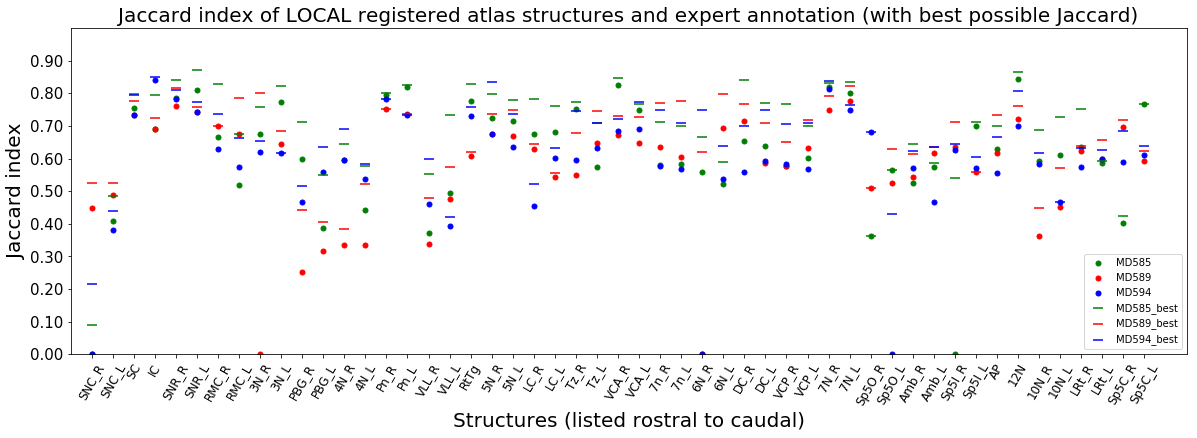

In [37]:
plot_by_stack_by_structure_with_best(jaccard_all_stacks_all_structures, 
                                     best_jaccard_all_stacks_all_structures,
                           structures=structures_sided_sorted_by_rostral_caudal_position,
#                            structures=structures_sided_sorted_by_rostral_caudal_position,
                           yticks=np.arange(0, 1., 0.1), 
                           yticklabel_fmt='%.2f',
                           ylabel='Jaccard index',
                           xlabel='Structures (listed rostral to caudal)',
                          title='Jaccard index of LOCAL registered atlas structures and expert annotation (with best possible Jaccard)',
                          stack_to_color={'MD589':(255,0,0), 'MD585': (0,127,0), 'MD594': (0,0,255)});

## Centroid error

In [38]:
diff_all_stacks_all_structures = \
{stack: {s: np.nanmin([v['centroid_diff_um'] for l, v in x_all_l.iteritems()]) 
         for s, x_all_l in x_all_s_all_l.iteritems()}
 for stack, x_all_s_all_l in local_registration_metrics_allStacks_allStructures_allLevels.iteritems()}

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: All-NaN axis encountered
  


In [39]:
print 'Median centroid error:', np.nanmedian([y for x in diff_all_stacks_all_structures.values() for y in x.values()]), 'um'

Median centroid error: 42.46399223685412 um


In [40]:
# Only show motor nuclei (for use together with CHAT figure).

diff_all_stacks_all_structures_motor_nuclei_only = {stack: {s: data_all_structures[s] 
                                                            for s in ['5N_L', '5N_R', '6N_L', '6N_R',
                                      '7N_L', '7N_R', 'Amb_L', 'Amb_R',
                                      '10N_L', '10N_R', '12N']} 
 for stack, data_all_structures in diff_all_stacks_all_structures.iteritems()}

In [41]:
# pd.DataFrame(diff_all_stacks_all_structures_motor_nuclei_only).to_csv(\
# '/home/yuncong/Dropbox/BrainProjectFiguresByTopic/Registration/compare_vs_expert_annotation/measurements/centroid_difference_3d_wrt_human_annotation_um_motor_nuclei_only.csv')

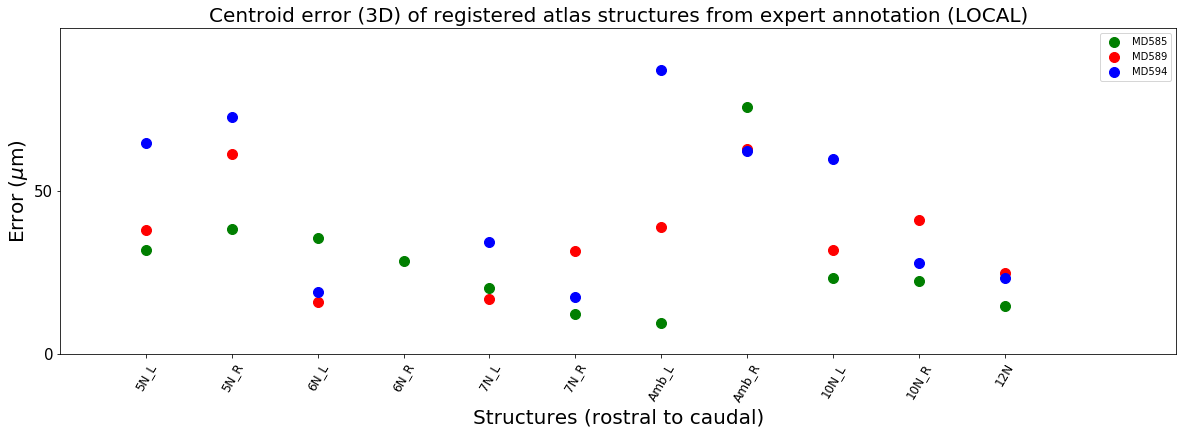

In [42]:
plot_by_stack_by_structure(diff_all_stacks_all_structures, 
                           structures=['5N_L', '5N_R', '6N_L', '6N_R',
                                      '7N_L', '7N_R', 'Amb_L', 'Amb_R',
                                      '10N_L', '10N_R', '12N'],
                           yticks=np.arange(0, 100, 50), 
                           yticklabel_fmt='%d',
                           ylabel='Error ($\mu$m)',
                           xlabel='Structures (rostral to caudal)',
                          title='Centroid error (3D) of registered atlas structures from expert annotation (LOCAL)',
                          stack_to_color={'MD589':(255,0,0), 'MD585': (0,127,0), 'MD594': (0,0,255)});

In [43]:
# Show all structures

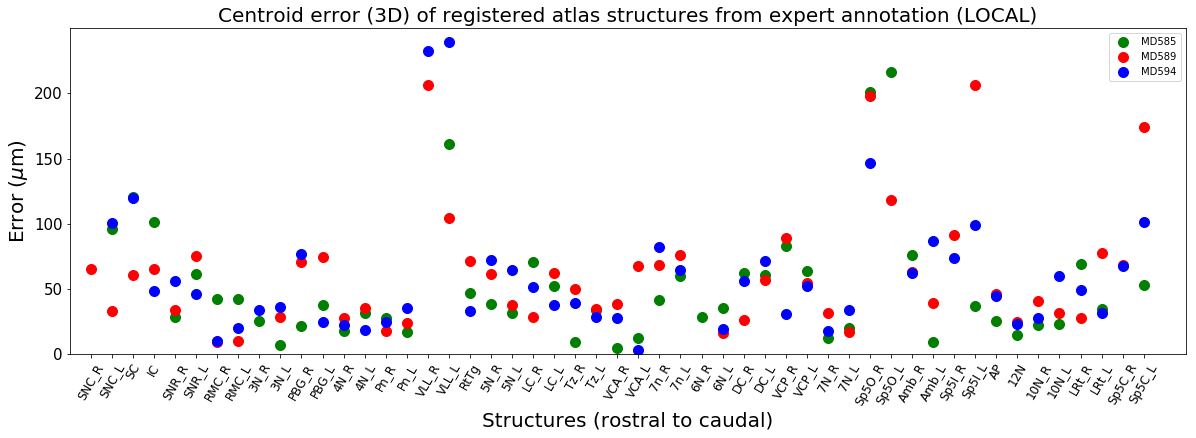

In [44]:
plot_by_stack_by_structure(diff_all_stacks_all_structures, 
                           structures=structures_sided_sorted_by_rostral_caudal_position,
#                            structures=all_known_structures_sided,
#                            yticks=np.arange(0, 300, 50), 
                           yticks=np.arange(0, 201, 50), 
                           yticklabel_fmt='%d',
                           ylabel='Error ($\mu$m)',
                           xlabel='Structures (rostral to caudal)',
                          title='Centroid error (3D) of registered atlas structures from expert annotation (LOCAL)',
                          stack_to_color={'MD589':(255,0,0), 'MD585': (0,127,0), 'MD594': (0,0,255)});

In [ ]:
# pd.DataFrame(diff_all_stacks_all_structures).to_csv(\
# '/home/yuncong/Dropbox/BrainProjectFiguresByTopic/Registration/compare_vs_expert_annotation/measurements/centroid_difference_3d_wrt_human_annotation_um.csv')

## Centroid error normalized by structure size

In [45]:
diffperc_all_stacks_all_structures = \
{stack: {s: np.nanmin([v['centroid_diff_percentage'] for l, v in x_all_l.iteritems()]) for s, x_all_l in x_all_s_all_l.iteritems()}
 for stack, x_all_s_all_l in local_registration_metrics_allStacks_allStructures_allLevels.iteritems()}

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: All-NaN axis encountered
  """Entry point for launching an IPython kernel.


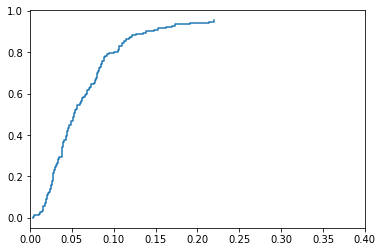

In [46]:
sorted_data = np.sort(([y for x in diffperc_all_stacks_all_structures.values() for y in x.values()]))
plt.step(sorted_data, np.arange(sorted_data.size)/float(len(sorted_data)));  # From 0 to the number of data points-1
plt.xlim([0, 0.4]);
# plt.step(sorted_data[::-1], np.arange(sorted_data.size))  # From the number of data points-1 to 0

In [47]:
print 'Median centroid error (normalized by structure size):', np.nanmedian([y for x in diffperc_all_stacks_all_structures.values() for y in x.values()])

Median centroid error (normalized by structure size): 0.05117729596793107


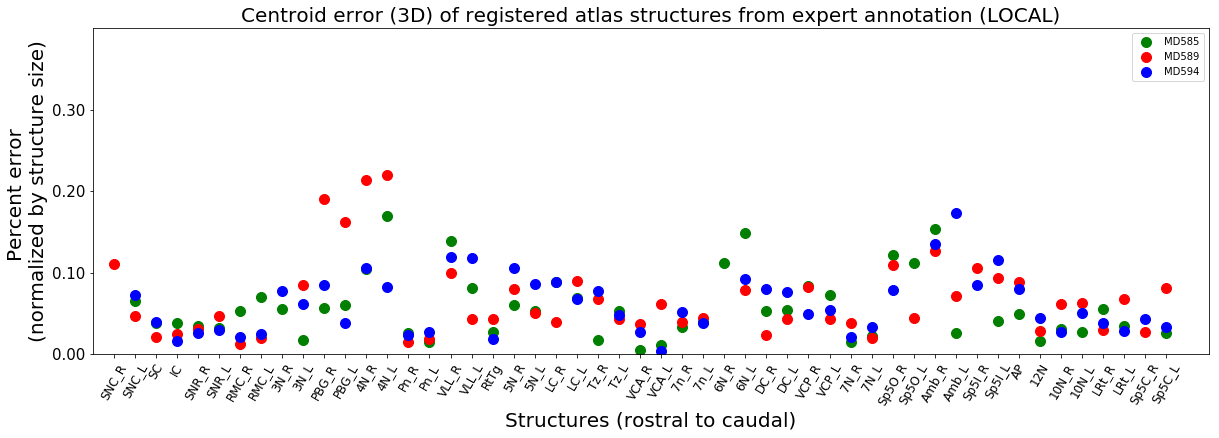

In [48]:
plot_by_stack_by_structure(diffperc_all_stacks_all_structures, 
                           structures=structures_sided_sorted_by_rostral_caudal_position,
                           yticks=np.arange(0, 0.35, 0.1), 
                            xlabel='Structures (rostral to caudal)',
                           ylabel='Percent error \n(normalized by structure size)',
                          title='Centroid error (3D) of registered atlas structures from expert annotation (LOCAL)',
                          stack_to_color={'MD589':(255,0,0), 'MD585': (0,127,0), 'MD594': (0,0,255)});

## Measure voxel value difference 

In [ ]:
meandiff_all_stacks_all_structures = \
{stack: {s: x_all_levels[0.5]['mean_diff']
         for s, x_all_levels in x_all_s_all_levels.iteritems()}
 for stack, x_all_s_all_levels in local_registration_metrics_allStacks_allStructures_allLevels.iteritems()}

In [ ]:
print 'Mean voxel value difference:', np.median([y for x in meandiff_all_stacks_all_structures.values() for y in x.values()])

In [80]:
plot_by_stack_by_structure(meandiff_all_stacks_all_structures, 
                           structures=structures_sided_sorted_by_rostral_caudal_position,
                           yticks=np.arange(0.1, 0.5, 0.1), 
                            xlabel='Structures (rostral to caudal)',
                           ylabel='Mean voxel value difference',
                          title='Probability difference between registered atlas structures and expert annotations (LOCAL)',
                          stack_to_color={'MD589':(255,0,0), 'MD585': (0,127,0), 'MD594': (0,0,255)});